# Nearest Centroid

In deze opdracht ga je Nearest Centroid classificatie implementeren om afbeeldingen van handgeschreven getallen te leren herkennen.   
Voor informatie over de dataset, zie: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [27]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# dataset
from sklearn.datasets import load_digits

# testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import pandas as pd

## 1. Data laden

* Laad de digits dataset.
* Sla de data samples op onder de variabele 'X'.
* Hoeveel samples zijn er? En hoeveel features heeft elk sample?

In [3]:
data = load_digits()

X = data.data
print(X.shape)

(1797, 64)


* Sla de targets op onder de variabele 'y'.
* Welke unieke targets zijn er?

In [4]:
y = data.target
print(data.target_names)

[0 1 2 3 4 5 6 7 8 9]


* Verdeel de data in een train set (80%) en test set (20%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Centroids berekenen

  * Bereken voor elk type digit de gemiddelde feature vector (de 'centroid').  
  Het resultaat is een matrix met shape = [n_centroids, n_features].

In [6]:
centroids = np.asarray([np.mean(X_train[y_train == cls], axis=0) for cls in np.unique(y)])
centroids.shape

(10, 64)

Met onderstaande code kan één geleerde centroid gevisualiseerd worden.
* Herschrijf de code zodat alle centroids gevisualiseerd worden

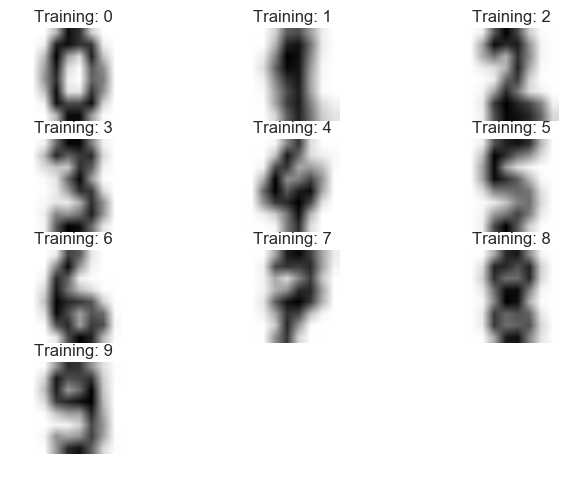

In [7]:
images_and_labels = list(zip(centroids, range(11)))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(4, 3, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)

## 3. Nieuwe digits classificeren

  * Bereken voor elke sample in de test data, de meest dichtbijzijnde centroid door middel van de Manhattan distance.

In [9]:
y_pred_manhattan = [
    np.argmin([sum(np.abs(sample - centroid))
                           for centroid in centroids]) 
    
                for sample in X_test]
len(y_pred_manhattan)

360

* Bereken voor elke sample in de test data, de meest dichtbijzijnde centroid door middel van de Euclidean distance.

In [14]:
y_pred_euclidean = [
    np.argmin([np.sqrt(sum((sample - centroid) ** 2))
                               for centroid in centroids])
                    for sample in X_test]

* Optioneel: Bereken de meest dichtbijzijnde centroids d.m.v. de $\chi^2$ distance.

In [29]:
## PAS OP! Hier wordt nan door 0 vervangen, en zal dus np.argmin niet heel zinnig zijn.
y_pred_chisq = [np.argmin([sum(np.nan_to_num(((sample - centroid) ** 2)/(sample+centroid)))
                           for centroid in centroids]) 
                for sample in X_test]


/home/jeanpaul/th-cloud/MLcourse/VENV/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


* Bereken de F1 score per target (digit) en per distance-measure
* Zet de F1 scores om in error scores (1 - F1 score)

In [30]:
errors_manhattan = 1 - f1_score(y_test, y_pred_manhattan, average=None)
errors_manhattan

array([ 0.02941176,  0.14705882,  0.02941176,  0.08333333,  0.07462687,
        0.14285714,  0.04444444,  0.11111111,  0.12941176,  0.18421053])

In [31]:
errors_euclidean = 1 - f1_score(y_test, y_pred_euclidean, average=None)
errors_euclidean

array([ 0.        ,  0.11764706,  0.04347826,  0.07042254,  0.03030303,
        0.09090909,  0.01149425,  0.09677419,  0.10344828,  0.15789474])

In [32]:
errors_chisq = 1 - f1_score(y_test, y_pred_chisq, average=None)
errors_chisq

array([ 0.01449275,  0.13432836,  0.02941176,  0.08571429,  0.04477612,
        0.0625    ,  0.01149425,  0.09677419,  0.07692308,  0.17333333])

Voor elke distance measure:
* Plot de errors per target in een histogram plot.
* Zet het y-as label op 'Error' en het x-as label op 'Digit'.

(Bonus punten als je de bars combineert in 1 plaatje)

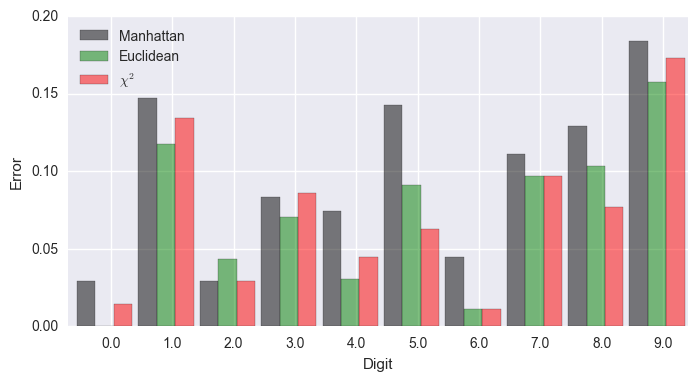

In [37]:
# plot f1 scores as bars
positions = np.arange(10) - 0.45

bar_width = 0.30

fig, ax = plt.subplots(figsize=(8,4))

plt.bar(positions, errors_manhattan,
        width=bar_width,
        color='k',
        alpha=0.5,
        label='Manhattan')
plt.bar(positions + bar_width, errors_euclidean,
        width=bar_width,
        color='g',
        alpha=0.5,
        label='Euclidean')
plt.bar(positions + 2 * bar_width, errors_chisq,
        width=bar_width,
        color='r',
        alpha=0.5,
        label='$\chi^2$')

# limit range of axes
axes = plt.gca()
axes.set_xlim([-0.6, 9.5])

# label each digit on x-axis
plt.xticks(np.arange(0, 10, 1.0) + (bar_width/3), np.arange(0, 10, 1.0))

# set axes labels
plt.ylabel('Error')
plt.xlabel('Digit')
plt.legend(loc='upper left')

# show plot
plt.show()